In [72]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [73]:
df = pd.read_csv("Downloads\StudentsPerformance.csv")

# To display the top 5 rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [74]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [75]:
df.shape

(1000, 8)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     998 non-null float64
reading score                  996 non-null float64
writing score                  998 non-null float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [77]:
df.describe()

,math score,reading score,writing score
count,998.000000,996.000000,998.000000
mean,66.116232,69.207831,68.067134
std,15.155712,14.541708,15.203287
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [78]:
np.unique(df['parental level of education'])

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

In [79]:
df_35=df[df['math score']<=35]
df_35.shape

(27, 8)

In [80]:
df.iloc[[12,19,47]]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,female,group B,high school,standard,none,NaN,81.0,73.0
19,female,group C,associate's degree,free/reduced,none,54.0,58.0,61.0
47,female,group C,high school,standard,none,66.0,71.0,76.0


In [81]:
df.isnull().any(axis=0)

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                   True
writing score                   True
dtype: bool

In [82]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  4
writing score                  2
dtype: int64

In [83]:
df_nulls=df[df.isnull().any(axis=1)]
df_nulls[['math score','reading score','writing score']]

,math score,reading score,writing score
11,NaN,52.0,43.0
12,NaN,81.0,73.0
15,69.0,NaN,78.0
16,88.0,NaN,86.0
17,18.0,NaN,28.0
18,46.0,NaN,46.0
21,65.0,75.0,NaN
22,44.0,54.0,NaN


In [84]:
df_nulls.index

Int64Index([11, 12, 15, 16, 17, 18, 21, 22], dtype='int64')

In [85]:
df=df.dropna()

In [86]:
df.shape

(992, 8)

In [87]:
selected_columns=['gender','parental level of education','test preparation course','math score','reading score','writing score']

In [88]:
df=df[selected_columns]
df.shape

(992, 6)

In [89]:
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72.0,72.0,74.0
1,female,some college,completed,69.0,90.0,88.0
2,female,master's degree,none,90.0,95.0,93.0
3,male,associate's degree,none,47.0,57.0,44.0
4,male,some college,none,76.0,78.0,75.0


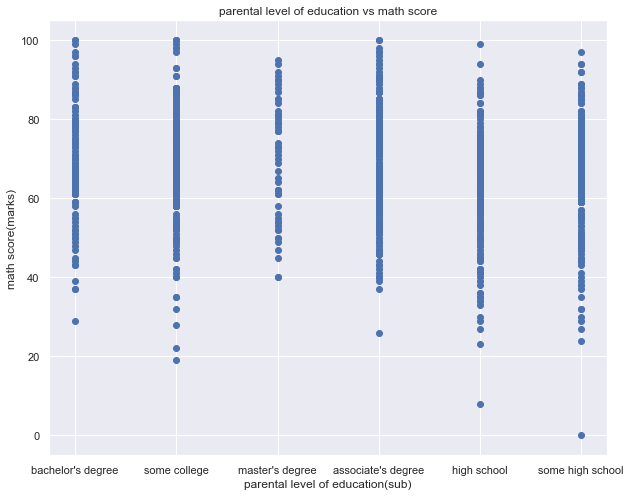

In [90]:
plt.figure(figsize=(10,8))
plt.scatter(df['parental level of education']
            , df['math score'])
plt.title('parental level of education vs math score')
plt.xlabel('parental level of education(sub)')
plt.ylabel('math score(marks)')
plt.show()

In [91]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [93]:
df['test preparation course']=label_encoder.fit_transform(df['test preparation course'])

In [94]:
df.sample(5)

,gender,parental level of education,test preparation course,math score,reading score,writing score
333,male,associate's degree,1,90.0,78.0,81.0
633,female,high school,1,75.0,88.0,85.0
24,male,bachelor's degree,0,74.0,71.0,80.0
892,female,master's degree,1,50.0,67.0,73.0
969,female,bachelor's degree,1,75.0,84.0,80.0


In [95]:
categorical_feature=df.dtypes==object

In [96]:
categorical_feature

gender                          True
parental level of education     True
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [97]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [98]:
df=pd.get_dummies(df)

In [99]:
df.head(5)

,test preparation course,math score,reading score,writing score,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,72.0,72.0,74.0,1,0,0,1,0,0,0,0
1,0,69.0,90.0,88.0,1,0,0,0,0,0,1,0
2,1,90.0,95.0,93.0,1,0,0,0,0,1,0,0
3,1,47.0,57.0,44.0,0,1,1,0,0,0,0,0
4,1,76.0,78.0,75.0,0,1,0,0,0,0,1,0


In [100]:
df.shape

(992, 12)